# Interactive computing with live notebooks: IHaskell demo and workshop

[Franklin Chen](http://franklinchen.com/)

March 9, 2015

## [Pittsburgh Haskell](http://PittsburghHaskell.org/)

<img src="https://raw.githubusercontent.com/pittsburgh-haskell/pittsburgh-haskell-logo/master/pittsburgh-haskell-256.png" width="180" height="180"/>

## [Code and Supply](http://CodeAndSupply.co/)

<img src="http://static1.squarespace.com/static/538f3cc8e4b00f52172b5560/t/53d83b54e4b02f0d5e5cf44f/1425582033325/?format=1500w" width="256" height="256"/>

(Those were examples of embedding [Markdown](http://daringfireball.net/projects/markdown/) in notebooks.)

## Keyboard shortcuts!

**Control-m h** brings up a helpful cheat sheet of keyboard shortcuts.

## First examples of usage

### Expressions

A single expression results in its
- evaluation
- display (which can be customized)

In [1]:
5 + 9 

14

A cell can have multiple expressions.

In [2]:
"hello, " ++ "world"

if length "silly" > 100
  then "nonsense"
  else "OK"

"hello, world"

"OK"

### Bindings

Bindings may be made, and interleaved with expressions.

In [3]:
greet personName = "hello, " ++ personName

lisaGreeting = greet "Lisa"

lisaGreeting

"hello, Lisa"

In [4]:
greet "John"

"hello, John"

### IO

IO can be performed just as in GHCi.

In [5]:
putStrLn "I am printing to standard output"

I am printing to standard output

Note that re-evaluating a stateful computation in the `IO` context will update the output accordingly.

Below, we use an API from the [`time`](http://hackage.haskell.org/package/time-1.5.0.1/docs/Data-Time-Clock.html) package where

```haskell
getCurrentTime :: IO UTCTime
```

when evaluated in the `IO` context returns a `UTCTime`.

In [6]:
import Data.Time.Clock (getCurrentTime)

now <- getCurrentTime
print now

2015-03-08 06:54:44.707099 UTC

Long-running computation with incremental output can be done.

In [7]:
import Control.Monad (forM_)
import Control.Concurrent (threadDelay)

forM_ [1..5] $ \x -> do
  print x
  threadDelay $ 800 * 1000

1
2
3
4
5


## Informational features

You can ask for the type of something.

In [8]:
:t [("hello", True), ("world", False)]

[("hello", True), ("world", False)] :: [([Char], Bool)]

In [9]:
:t map

map :: forall a b. (a -> b) -> [a] -> [b]

You can look up documentation.

Normally, this goes into a nice pager pane that you can dismiss, but for now, let's turn off the pager.

In [10]:
:opt no-pager

In [11]:
:doc concat

concat ∷ [[a]] → [a] ( package base , module Prelude ) Concatenate a list of lists. 
 
 
 concat ∷ Foldable t ⇒ t [a] → [a] ( package base , module Data.Foldable ) The concatenation of all the elements of a container of lists. 
 
 
 concat ∷ [ByteString] → ByteString ( package bytestring , module Data.ByteString ) O(n) Concatenate a list of ByteStrings. 
 
 
 concat ∷ [Text] → Text ( package text , module Data.Text ) O(n) Concatenate a list of Texts.

Use Hoogle to search for something by type signature.

In [12]:
:hoogle (a -> b) -> [a] -> [b]

map ∷ (a → b) → [a] → [b] ( package base , module Prelude ) map f xs is the list obtained by applying f to each element of xs, i.e.,
 
 
 > map f [x1, x2, ..., xn] == [f x1, f x2, ..., f xn]
> map f [x1, x2, ...] == [f x1, f x2, ...] 
 
 
 parMap ∷ Strategy b → (a → b) → [a] → [b] ( package parallel , module Control.Parallel.Strategies ) A combination of parList and map, encapsulating a common pattern:
 
 
 > parMap strat f = withStrategy (parList strat) . map f 
 
 
 liftA ∷ Applicative f ⇒ (a → b) → f a → f b ( package base , module Control.Applicative ) Lift a function to actions. This function may be used as a value for fmap in a Functor instance. 
 
 
 fmapDefault ∷ Traversable t ⇒ (a → b) → t a → t b ( package base , module Data.Traversable ) This function may be used as a value for fmap in a Functor instance. 
 
 
 fmap ∷ Functor f ⇒ (a → b) → f a → f b ( package base , module Prelude ) 
 (<$>) ∷ Functor f ⇒ (a → b) → f a → f b ( package base , module Data.Functor ) An infix synonym for fmap. 
 
 
 liftM ∷ Monad m ⇒ (a1 → r) → m a1 → m r ( package base , module Control.Monad ) Promote a function to a monad. 
 
 
 (<*>) ∷ Applicative f ⇒ f (a → b) → f a → f b ( package base , module Control.Applicative ) 
 (<**>) ∷ Applicative f ⇒ f a → f (a → b) → f b ( package base , module Control.Applicative ) A variant of <*> with the arguments reversed. 
 
 
 iterate ∷ (a → a) → a → [a] ( package base , module Prelude ) iterate f x returns an infinite list of repeated applications of f to x:
 
 
 > iterate f x == [x, f x, f (f x), ...] 
 
 
 dropWhile ∷ (a → Bool) → [a] → [a] ( package base , module Prelude ) dropWhile p xs returns the suffix remaining after takeWhile p xs:
 
 
 > dropWhile (< 3) [1,2,3,4,5,1,2,3] == [3,4,5,1,2,3]
> dropWhile (< 9) [1,2,3] == []
> dropWhile (< 0) [1,2,3] == [1,2,3] 
 
 
 filter ∷ (a → Bool) → [a] → [a] ( package base , module Prelude ) filter, applied to a predicate and a list, returns the list of those elements that satisfy the predicate; i.e.,
 
 
 > filter p xs = [ x | x <- xs, p x] 
 
 
 takeWhile ∷ (a → Bool) → [a] → [a] ( package base , module Prelude ) takeWhile, applied to a predicate p and a list xs, returns the longest prefix (possibly empty) of xs of elements that satisfy p:
 
 
 > takeWhile (< 3) [1,2,3,4,1,2,3,4] == [1,2]
> takeWhile (< 9) [1,2,3] == [1,2,3]
> takeWhile (< 0) [1,2,3] == [] 
 
 
 ($) ∷ (a → b) → a → b ( package base , module Prelude ) Application operator. This operator is redundant, since ordinary application (f x) means the same as (f $ x). However, $ has low, right-associative binding precedence, so it sometimes allows parentheses to be omitted; for example:
 
 
 > f $ g $ h x = f (g (h x))
 
 
 It is also useful in higher-order situations, such as map ($ 0) xs, or Data.List.zipWith ($) fs xs. 
 
 
 ($!) ∷ (a → b) → a → b ( package base , module Prelude ) Strict (call-by-value) application, defined in terms of seq. 
 
 
 all ∷ (a → Bool) → [a] → Bool ( package base , module Prelude ) Applied to a predicate and a list, all determines if all elements of the list satisfy the predicate. For the result to be True, the list must be finite; False, however, results from a False value for the predicate applied to an element at a finite index of a finite or infinite list. 
 
 
 any ∷ (a → Bool) → [a] → Bool ( package base , module Prelude ) Applied to a predicate and a list, any determines if any element of the list satisfies the predicate. For the result to be False, the list must be finite; True, however, results from a True value for the predicate applied to an element at a finite index of a finite or infinite list. 
 
 
 ap ∷ Monad m ⇒ m (a → b) → m a → m b ( package base , module Control.Monad ) In many situations, the liftM operations can be replaced by uses of ap, which promotes function application.
 
 
 > return f `ap` x1 `ap` ... `ap` xn
 
 
 is equivalent to
 
 
 > liftMn f x1 x2 ... xn 
 
 
 sortWith ∷ Ord b ⇒ (a → b) → [a] → [a] ( package base , module GHC.Exts ) 

## Custom displays of data types

Now, for the fun part of IHaskell, improving visualization!

### Defining data types

[Example code](https://github.com/pittsburgh-haskell/haskell-intro-session/blob/master/src/Tutorial.hs) from the [first Pittsburgh Haskell session in February](http://www.meetup.com/Pittsburgh-Code-Supply/events/219254888).

In [13]:
-- | Type synonym: just syntactic alias
type AccountNumber = Int

-- | Type synonym: just syntactic alias
type Why = String

-- | 'Yes' variant has 2 fields, 'No' has 1 field,
-- 'Ignore' has 0 fields
data OptIn =
    Yes AccountNumber -- ^ user submitted account number
  | No Why            -- ^ user submitted a reason not to opt in
  | Ignore            -- ^ user filled in nothing
    deriving (Show)

In [14]:
-- | Did the user respond?
userResponded :: OptIn -> Bool
userResponded response =
  case response of
    Yes _  -> True
    No _   -> True
    Ignore -> False

In [15]:
-- | I love getting spam.
violateMyPrivacy :: OptIn
violateMyPrivacy = Yes 1234

-- | Take me off your list.
refuseIt :: OptIn
refuseIt = No "no thanks"

userActions :: [OptIn]
userActions = [Ignore, violateMyPrivacy, refuseIt, Ignore]

userResponses = filter userResponded userActions

The default display, uses the `Show` instance we derived, which is what `print` uses, is a little boring, perhaps?

In [16]:
print violateMyPrivacy
print refuseIt
print userActions
print userResponses

Yes 1234

No "no thanks"

[Ignore,Yes 1234,No "no thanks",Ignore]

[Yes 1234,No "no thanks"]

### How to define your own display

IHaskell allows you to define a custom display of any of your data types. You simply have to implement the type class `IHaskellDisplay`, which is [defined as](https://github.com/gibiansky/IHaskell/blob/master/src/IHaskell/Types.hs)

```haskell
class IHaskellDisplay a where
  display :: a -> IO Display
```

where `Display` is composed of pieces of [`DisplayData`](https://github.com/gibiansky/IHaskell/blob/master/ipython-kernel/src/IHaskell/IPython/Types.hs):

```haskell
data Display = Display [DisplayData]
             | ManyDisplay [Display]
             
data DisplayData = DisplayData MimeType Text

data MimeType = PlainText
              | MimeHtml
              | MimePng Width Height
              | MimeJpg Width Height
              | MimeSvg
              | MimeLatex
              | MimeJavascript
```

#### Defining a custom display for `OptIn`

Instead of displaying the data constructor name (such as `Yes`), let's color the data that it wraps, by generating HTML.

And since we love collecting people's personal data, let's color a `Yes` as <span style='color: green'>green</span>, and a `No` as <span style='color: red'>red</span>.

For `Ignore`, we display a frowny face Unicode character ☹ here because we can. We could also insert an image or an animation or some such thing.

In [17]:
import IHaskell.Display

instance IHaskellDisplay OptIn where
  display action = return $ Display [plain $ show action, html $ code action]
    where
      code action = concat ["<span style='font-weight: bold; color:"
                           , colorIt action
                           , "'>"
                           , showString action
                           , "</span>"]
                           
      colorIt (Yes _) = "green"
      colorIt (No _)  = "red"
      colorIt Ignore  = "blue"
      
      showString (Yes y) = show y
      showString (No n)  = show n
      showString Ignore  = "☹"

In [18]:
violateMyPrivacy

Yes 1234

In [19]:
refuseIt

No "no thanks"

In [20]:
userActions

Ignore

Yes 1234

No "no thanks"

Ignore

Note that the display is still a bit primitive, because the list of displayed items is just by default one element after another.

As an exercise, you may wish to implement `instance IHaskellDisplay [OptIn]` to specially display a list of `OptIn`.

### Community-contributed display plugins

More and more implementations of [displays are being contributed to IHaskell](https://github.com/gibiansky/IHaskell/tree/master/ihaskell-display) by the community.

For example, the `Maybe` type already has a display. Note that you need to take care when mixing and matching displays, because, for example, we already used coloring for our `OptIn` display.

In [21]:
fruitCounts = [("banana", 3), ("apple", 4), ("pear", 1)]

lookup "apple" fruitCounts
lookup "orange" fruitCounts

Just 4

Nothing

#### `diagrams` display is cool

[`diagrams`](http://projects.haskell.org/diagrams/) is a nice library for programmatically creating vector graphics.

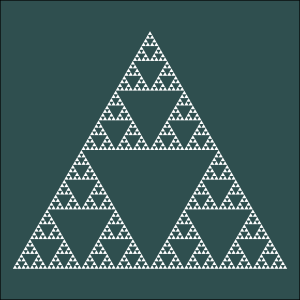

In [22]:
:extension NoMonomorphismRestriction
import Diagrams.Prelude

sierpinski 1 = eqTriangle 1
sierpinski n =     s
                  ===
               (s ||| s) # centerX
  where s = sierpinski (n-1)

diagram $ sierpinski 7 # centerXY # lw none # fc white
                  `atop` square 70 # fc darkslategray

#### HTML canvas

In [23]:
{-# LANGUAGE OverloadedStrings #-}

import qualified Graphics.Static as S
import qualified Graphics.Static.ColorNames as C

canvasExample :: Canvas
canvasExample = Canvas 1000 200 $ do
  S.font "italic 60pt Calibri"
  S.lineWidth 6
  S.strokeStyle C.blue
  S.fillStyle C.goldenrod
  S.textBaseline S.TextBaselineMiddle
  S.strokeText "Hello" 150 100 
  S.fillText "Hello World!" 150 100
  
canvasExample

### Let's display a tree better

There is a standard generic `Tree` type: each tree is a node containing a value and a list of subtrees.

But the `Show` instance of `Tree a` is not great for reading:

In [24]:
import Data.Tree

myTree :: Tree String
myTree = Node "A" [ Node "B" [ Node "C" []
                             , Node "D" []
                             ]
                  , Node "E" [ Node "F" [] ]
                  ]

print myTree

Node {rootLabel = "A", subForest = [Node {rootLabel = "B", subForest = [Node {rootLabel = "C", subForest = []},Node {rootLabel = "D", subForest = []}]},Node {rootLabel = "E", subForest = [Node {rootLabel = "F", subForest = []}]}]}

But `drawTree` in the API is helpful:

In [25]:
putStr $ drawTree myTree

A
|
+- B
|  |
|  +- C
|  |
|  `- D
|
`- E
   |
   `- F

We can (and perhaps should) define a fancy graphical display of the standard `Tree` data type, but for now, let's just use this ASCII-art version.

In [26]:
:ext FlexibleInstances

instance IHaskellDisplay (Tree String) where
  display tree = return $ Display [plain $ drawTree tree]


Now we can visualize trees better.

In [27]:
myTree

A
|
+- B
|  |
|  +- C
|  |
|  `- D
|
`- E
   |
   `- F

In [28]:
firstSubtree :: Tree a -> Tree a
firstSubtree (Node _ (subTree:_)) = subTree
                 
firstSubtree myTree

B
|
+- C
|
`- D

### Design tradeoffs when writing displays

It is not necessarily wise to write a display instance for a data type, because you can have only one instance for the data type. What if you want to sometimes display something one way, and sometimes display it another?

There are two options:
- Use Haskell's `newtype` as a hack to define a synonym for a type that can be treated as a separate type so you can define an instance for it.
- Just explicitly call a display function rather than using `display` of the `IHaskellDisplay` type class.

#### ASCII diagram

There is an amusing library called [`asciidiagram`](https://hackage.haskell.org/package/asciidiagram) that parses a text representation of a diagram into valid SVG.

##### Example text

In [29]:
{-# LANGUAGE OverloadedStrings #-}

import qualified Text.AsciiDiagram as AsciiDiagram
import qualified Data.Text as Text
import qualified Graphics.Svg as Svg
import qualified Text.XML.Light as XML

-- | Major shame that Haskell does not have multiline or raw
-- string literals!
thing :: Text.Text
thing = Text.unlines [ "                /---------+"
                     , "+---------+     |         |"
                     , "|  ASCII  +---->| Diagram |"
                     , "+---------+     |         |"
                     , "|{flat}   |     +--+------/"
                     ,"\\---*-----/<=======/"
                     , "::: .flat { fill: #DDD; }"
                     ]

thing

                /---------+
+---------+     |         |
|  ASCII  +---->| Diagram |
+---------+     |         |
|{flat}   |     +--+------/
\---*-----/<=======/
::: .flat { fill: #DDD; }

##### What if we want to display as SVG?

Since IHaskell can display SVG, all we need to do is transform the SVG data (represented in a type) into valid XML (represented in a type) into a string that is finally interpreted by IHaskell using the `svg` function.

In [30]:
asciiTextToSVGString :: Text.Text -> String
asciiTextToSVGString = XML.showTopElement
                       . Svg.xmlOfDocument
                       . AsciiDiagram.svgOfDiagram
                       . AsciiDiagram.parseAsciiDiagram

svg $ asciiTextToSVGString thing

##### Automatic display another way

What if we wanted to display automatically without calling `svg` and our helper function `asciiTextToXMLString`?

We can use the `newtype` trick to define an instance of `IHaskellDisplay` for a wrapper type `AsciiDisplay` and then wrap the text when we want it to be displayed as an SVG diagram.

In [31]:
newtype AsciiDisplay = AsciiDisplay Text.Text

instance IHaskellDisplay AsciiDisplay where
  display (AsciiDisplay t) = return $ Display [ plain $ show $ Text.unpack t
                                              , svg $ asciiTextToSVGString t
                                              ]
  
AsciiDisplay thing

"                /---------+\n+---------+     |         |\n|  ASCII  +---->| Diagram |\n+---------+     |         |\n|{flat}   |     +--+------/\n\\---*-----/<=======/\n::: .flat { fill: #DDD; }\n"

#### Improving the ASCII tree display

Let's reuse the ASCII diagram generator to turn the tree ASCII display into a diagram!

In [32]:
treeToSVGString :: Tree String -> String
treeToSVGString = asciiTextToSVGString
                  . Text.pack
                  . map replaceBackQuote
                  . drawTree

-- | Because asciidiagram wants + not `
replaceBackQuote :: Char -> Char
replaceBackQuote '`' = '+'
replaceBackQuote c = c

svg $ treeToSVGString myTree

